In [1]:
H0 = 70
OmegaL = 0.7
OmegaM = 1 - OmegaL
H0 = H0 / 3.08e19 * 60 * 60 * 24 * 365 * 1e6
H = H0
c = 1
z = 0
t = 0
x = 0


data = [[0, 0, 0, 0]]

objs = []
objs.append({"x": 1, "data": [1]})
for n in range(30):
    objs.append({"x": n * 1000, "x0": n * 1000, "data": [n * 1000]})

while x >= 0:
    t -= 1
    x += c - H * x
 
    for obj in objs:
        obj["x"] -= H * obj["x"]
        obj["data"].append(obj["x"])
    
    H = H0 * (OmegaM * objs[0]["x"]**-3 + OmegaL)**0.5

    data.append([z, t, x, x * (1 + z)])


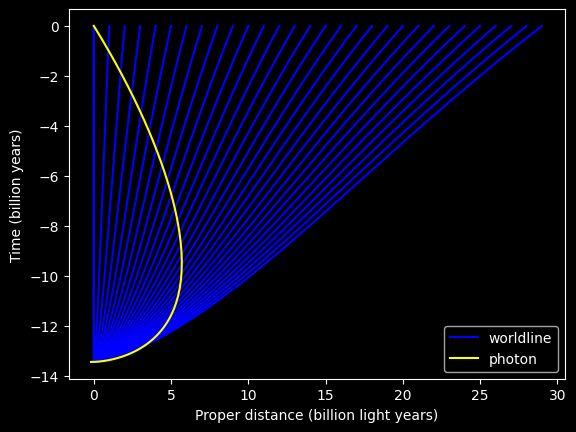

In [2]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

dataA = [row[2]/1000 for row in data]
dataT = [row[1]/1000 for row in data]


for obj in objs:
    objData = [row/1000 for row in obj["data"]]
    if obj == objs[0]:
        plt.plot(objData, dataT, color = "blue", label = "worldline")
    else:
        plt.plot(objData, dataT, color = "blue")


plt.plot(dataA, dataT, label = "photon", color = "yellow")
    
plt.xlabel("Proper distance (billion light years)")
plt.ylabel("Time (billion years)")

plt.legend()

plt.savefig('wl.png',  bbox_inches='tight')
plt.show()